# 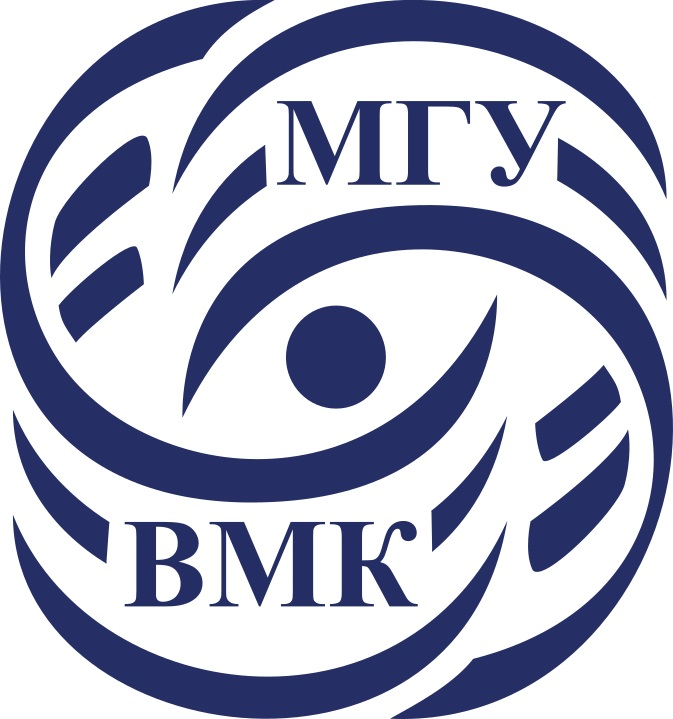

# Машинное обучение. ВМК МГУ

# Практическое задание 3: Линейные модели: регрессия

## Уровень: <font color='MediumSeaGreen'>**Исследовательский (Research)**</font>

# О формате сдачи

🔷 **<font color='plum'>При решении ноутбука используйте данный шаблон</font>**

    ✅ Можно добавлять новые ячейки любых типов
    ❌ Не нужно удалять текстовые ячейки c разметкой частей ноутбука и формулировками заданий


🔷 **<font color='plum'>При оценивании задач учитывается код</font>**

    ✅ Задания, в которых необходим код, обычно помечаются фразами "Your code here"/"Ваш код" и аналогичными
    ❌ Ответы на вопросы без сопутствующего кода оцениваются в 0 баллов
    ❌ Наличе работоспособного кода в ноутбуке, если на сказано иного, обязательно

🔷 **<font color='plum'>При оценивании задач учитываются выводы</font>**

    ✅ Задания, в которых необходимы выводы, обычно помечаются фразами Вывод"/"Ответ на вопрос"/"Ваш текст" и аналогичными
    ✅ Обычно выводы подразумевают под собой текстовый ответ (можно писать markdown, latex).
    ✅ Сопутствующие изображения, графики, таблички - приветствуются!
    ❌ При отсутствии выводов задание не засчитается на полный балл

-----------
<font color="white" style="opacity:0.2024"></font>







Цель данного задания:

* Узнать, что такое переобучение и как с ним бороться в линейных моделях;
* Понять, чем отличаются разные регуляризаторы;
* Научиться решать задачу регрессии линейными моделями.
-------
<font color=DarkOrange>**Примерное время выполнения (execution time/время выполнения, если нажать run all) всех ячеек ноутбука при правильной реализации: 7 минут </font>**

# Подготовка рабочей среды

Сначала установим нужные нам версии библиотек. Мы гарантируем, что в данных версиях задание будет корректно отрабатывать.

После установки нужных версий, **возможно,** нужно перезагрузить среду (runtime), но скорее всего вам это не понадобится


На скачивание файла и установку понадобится не более 5 минут.

<font color='OrangeRed'>**Важно!**</font>

Устанавливать нужные версии нужно каждый раз, когда создается новый рантайм. Например, если вы 2 часа подряд делаете это задание, то подготовить библиотеки достаточно 1 раз. Но если вы, например, начали в понедельник, затем закрыли/выключили ноутбук, то при продолжении в среду, вам нужно будет запустить рантайм заново и следовательно заново установить библиотеки.

<font color='OrangeRed'>**Важно!**</font>
Если вы предпочитаете делать практические задания на своем личном ноутбуке, то проверьте, что вы установили рабочее окружение в [соответствии с гайдом](https://github.com/MSU-ML-COURSE/ML-COURSE-24-25/blob/main/tutorials/%D0%A2%D1%83%D1%82%D0%BE%D1%80%D0%B8%D0%B0%D0%BB%20%D0%BF%D0%BE%20%D1%83%D1%81%D1%82%D0%B0%D0%BD%D0%BE%D0%B2%D0%BA%D0%B5%20%D1%80%D0%B0%D0%B1%D0%BE%D1%87%D0%B5%D0%B3%D0%BE%20%D0%BE%D0%BA%D1%80%D1%83%D0%B6%D0%B5%D0%BD%D0%B8%D1%8F%20%D0%B2%20Python%20%D0%B4%D0%BB%D1%8F%20%D1%80%D0%B5%D1%88%D0%B5%D0%BD%D0%B8%D1%8F%20%D0%B7%D0%B0%D0%B4%D0%B0%D1%87%20(2).pdf)


In [ ]:
# !!! Данный блок будет работать только в Google-Colab !!!
! gdown 10k8Hwn9kpK9SpK4IEj4-EaWQZqgYT5-Q
! pip install -r /content/requirements_2024_25_for_colab_small.txt

Downloading...
From: https://drive.google.com/uc?id=10k8Hwn9kpK9SpK4IEj4-EaWQZqgYT5-Q
To: /content/requirements_2024_25_for_colab_small.txt
100% 375/375 [00:00<00:00, 1.10MB/s]


Проверим версию библиотеки:

In [ ]:
import catboost
assert(catboost.__version__ == '1.2.7')

Теперь можно приступать к выполнению задания! :)

-----------
<font color="white" style="opacity:0.2024"></font>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
sns.set(style="darkgrid")
%matplotlib inline

## Линейная регрессия и регуляризация

Напомним, что линейная регрессия — это модель следующего вида: $$a(x) = \langle w, x \rangle + b$$ где $w \in \mathbb{R}^d$, $b \in \mathbb{R}$. Обучить линейную регрессию — значит найти $w$ и $b$.

В модели линейной регрессии с $l_2$ регуляризацией мы оптимизируем следующий функционал:

$\frac{1}{N} \cdot ∑_{i=1}^M (w_1 \cdot x_{i1} + \dots w_n \cdot x_{in} + b - y_i)^2 + \frac{\alpha}{2} \cdot \left( w_1^2 + \dots + w_n^2 \right) \rightarrow \min_{w_1, \dots, w_n, b}$

В модели линейной регрессии с $l_1$ регуляризацией мы оптимизируем следующий функционал:

$\frac{1}{N} \cdot ∑_{i=1}^M (w_1 \cdot x_{i1} + \dots w_n \cdot x_{in} + b - y_i)^2 + \alpha \cdot \left( |w_1| + \dots + |w_n| \right) \rightarrow \min_{w_1, \dots, w_n, b}$

### <font color='DarkOrange'>**Задание 1 [1 балл]**</font>

Почему при обучении линейных моделей, коэффициент $b$ не регуляризуется? Дайте ответ с опорой на лекции. Возможно вам также поможет картика из базовой части

<font color='MediumOrchid'>**Ваши выводы тут:**</font>

Коэффициент b не регуляризируется, так как функции потерь (такие как MSE) уже учитывают влияние этого коэффициента без необходимости его регуляризировать. Кроме того, коэффициент b не увеличивает сложность модели, следовательно его регуляризация нецелесообразна. Также, он не зависит от входных данных, отвечая за смещение модели и позволяя корректировать уровень отклика, поэтому его регуляризация может привести к потере информации и ухудшить качество предсказаний.


-----
<font color="white" style="opacity:0.2023"></font>

Рассмотрим модель линейной регрессии с $l_2$ регуляризацией. В sklearn эта модель реализована посредством класса Ridge. В нём есть методы fit и predict. Первый принимает на вход обучающую выборку и вектор целевых переменных и обучает модель, второй, будучи вызванным после обучения модели, возвращает предсказание на выборке.

Сгенерируем случайные данные. Пусть $x$ будет обычным числом из равномерного распределения, а $𝑦=0.5 \cdot x + 0.1$ &mdash; целевая переменная. При этом наблюдаем мы $\overline{y} = y + \varepsilon,~\varepsilon \sim N(0, 0.01)$. Добавим в данные к переменной $x$ её же умноженную на $3$. То есть, теперь у нас два признака $x_1$ и $x_2 = 3 \cdot x_1$.

Поскольку  $y = c \cdot 0.5 \cdot x_1 + \frac{1 - c}{6} \cdot x_2 + 0.1$, где $c$ любое сколь угодно большое вещественное число. То, как мы могли убедиться в базовой части, без регуляризации есть риск выучить очень большие веса.

Посмотрим, как меняется значения весов, в зависимости от значения коэффициента регуляризации.

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
np.random.seed(1)
X = np.random.uniform(0, 1, 100)
Y = X * 0.5 + 0.1 + np.random.randn(100) * 0.1

X3 = np.hstack((X[:, None], 3 * X[:, None]))
Y3 = X3[:, 0] * 0.5 + 0.1 + np.random.randn(100) * 0.1

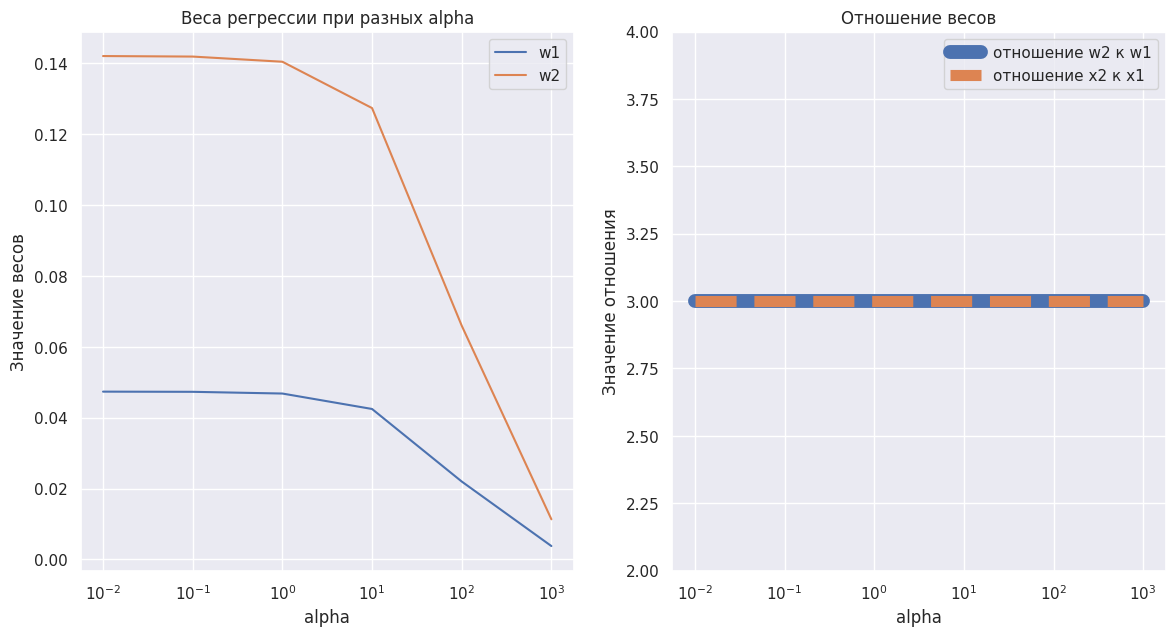

In [ ]:
w1 = []
w2 = []

alphas = [0.01, 0.1, 1, 10, 100, 1000]

for alpha in alphas:
    reg = Ridge(alpha=alpha)
    reg.fit(X3, Y3)
    w1.append(reg.coef_[0])
    w2.append(reg.coef_[1])

w1 = np.array(w1)
w2 = np.array(w2)

fig, axs = plt.subplots(figsize=(14, 7), ncols=2)
axs[0].plot(alphas, w1, label="w1")
axs[0].plot(alphas, w2, label="w2")
axs[0].set_xscale("log")
axs[0].set_title("Веса регрессии при разных alpha")
axs[0].set_xlabel("alpha")
axs[0].set_ylabel("Значение весов")
axs[0].legend()
axs[1].plot(alphas, w2 / w1, label="отношение w2 к w1", linewidth=10)
axs[1].plot([0.01, 1000], [3, 3], label="отношение x2 к x1", linestyle="--", linewidth=8)
axs[1].set_xscale("log")
axs[1].set_ylim(2,4)
axs[1].set_xlabel("alpha")
axs[1].set_ylabel("Значение отношения")
axs[1].set_title("Отношение весов")
axs[1].legend()
plt.show()

### <font color='DarkOrange'>**Задание 2 [2 баллa]**</font>

Как думаете, почему отношение между весами постоянно? (подсказка, необходимо выписать функцию потерь и посчитать производные по весам)

<font color='MediumOrchid'>**Ваши выводы тут:**</font>

Функция потерь для линейной регрессии с L2-регуляризацией:
$$ L(w) = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^{m} w_j^2 $$


где:
- $ L(w) $ — функция потерь,
- $ n $ — количество обучающих примеров,
- $ y_i $ — истинные значения,
- $ \hat{y}_i = \langle w, x_i \rangle + b $ — предсказанные значения,
- $ w_j $ — веса модели,
- $ m $ — количество признаков,
- $ \lambda $ — коэффициент регуляризации.

Производная функции потерь по весам $w_j$:

1. Производная первой части (ошибка):
   $$ \frac{\partial}{\partial w_j} \left( \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 \right) = -\frac{2}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i) x_{ij} $$

2. Производная второй части (регуляризация):
   $$ \frac{\partial}{\partial w_j} \left( \lambda \sum_{j=1}^{m} w_j^2 \right) = 2\lambda w_j $$

3. Общая производная:
   $$ \frac{\partial L(w)}{\partial w_j} = -\frac{2}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i) x_{ij} + 2\lambda w_j $$

Обновление для каждого веса:

$$ w_j = w_j - \eta \left( -\frac{2}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i) x_{ij} + 2\lambda w_j \right) $$


$ \eta $ — скорость обучения.

Отношение между весами остается постоянным, так как регуляризация влияет на все веса одинаково, добавляя одинаковый штраф к каждому весу пропорционально его значению, это и сохраняет отношение между весами постоянным. При вычислении градиентов для всех весов влияние регуляризации так же одинаково для всех весов.

Кроме того, если мы рассматриваем линейную модель, то изменения в одном весе будут влиять на предсказания модели так же, как изменения в других весах, и регуляризация сохраняет эту линейную зависимость.

-----
<font color="white" style="opacity:0.2023"></font>

Заметим, что при $l_2$ регуляризации в данном примере веса получились пропорциональны значениям признаков. При этом, мы знаем, что оба признака взаимно однозначны, и прогноз можно делать только по одному из них. Для этого придумана $l_1$ регуляризация. В билиотеке sklearn линейная регрессия с $l_1$ регуляризацией реализована в классе Lasso

### <font color='DarkOrange'>**Задание 3 [2 баллa]**</font>

Почему в нашем примере $l_1$ регуляризация приведёт к разреживанию весов? (подсказка, нужно опять подсчитать производную, но обратите внимание на дифференцируемость модуля).

<font color='MediumOrchid'>**Ваши выводы тут:**</font>

Функция потерь для линейной регрессии с L1-регуляризацией (Lasso):

$$ L(w) = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^{m} |w_j| $$


где:
- $ L(w) $ — функция потерь,
- $ n $ — количество обучающих примеров,
- $ y_i $ — истинные значения,
- $ \hat{y}_i = \langle w, x_i \rangle + b $ — предсказанные значения,
- $ w_j $ — веса модели,
- $ m $ — количество признаков,
- $ \lambda $ — коэффициент регуляризации.

Производные по весам $ w_j $:

1. Производная первой части (ошибка):
   $$ \frac{\partial}{\partial w_j} \left( \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 \right) = -\frac{2}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i) x_{ij} $$

2. Производная второй части (регуляризация):
   Для L1-регуляризации производная модуля имеет особенность: она не определена в точке, где $ w_j = 0 $. В других случаях:
   $$
   \frac{\partial}{\partial w_j} (\lambda |w_j|) =
   \begin{cases}
   \lambda & \text{если } w_j > 0\\
   -\lambda & \text{если } w_j < 0\\
   0 & \text{если } w_j = 0
   \end{cases}
   $$

3. Общая производная:
   Объединив оба результата, получаем:
   $$
   \frac{\partial L(w)}{\partial w_j} = -\frac{2}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i) x_{ij} +
   \begin{cases}
   2\lambda & \text{если } w_j > 0\\
   -2\lambda & \text{если } w_j < 0\\
   0 & \text{если } w_j = 0
   \end{cases}
   $$

L1-регуляризация имеет "острые" углы в точке $ w_j = 0$. Соответственно, градиент не определен в этой точке и оптимизация обнуляет некоторые веса. Когда градиент для некоторого веса становится равным нулю, этот вес не будет обновляться во время обучения, что приводит к тому, что некоторые признаки могут быть полностью исключены из модели.

Таким образом, L1-регуляризация приводит к разреживанию весов благодаря и особенностям производной. Наличие "острых" углов в функции потерь позволяют некоторым весам достигать значения ноль, что способствует отбору признаков и уменьшению сложности модели.

-----

Добавим $l_1$ регуляризацию и посмотрим, как меняется значения весов, в зависимости от значения коэффициента регуляризации.

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
reg = Lasso(alpha=1., max_iter=1000, tol=1e-4)
reg.fit(X3, Y3)
print("Веса, при alpha = 1.")
print("w1:", reg.coef_[0], "\tw2:", reg.coef_[1])
print()

reg = Lasso(alpha=0.1, max_iter=1000, tol=1e-4)
reg.fit(X3, Y3)
print("Веса, при alpha = 0.1")
print("w1:", reg.coef_[0], "\tw2:", reg.coef_[1])
print()

reg = Lasso(alpha=0.01, max_iter=1000, tol=1e-4)
reg.fit(X3, Y3)
print("Веса, при alpha = 0.01")
print("w1:", reg.coef_[0], "\tw2:", reg.coef_[1])
print()

reg = Lasso(alpha=0.001, max_iter=1000, tol=1e-4)
reg.fit(X3, Y3)
print("Веса, при alpha = 0.001")
print("w1:", reg.coef_[0], "\tw2:", reg.coef_[1])
print()

reg = Lasso(alpha=0.0001, max_iter=1000, tol=1e-4)
reg.fit(X3, Y3)
print("Веса, при alpha = 0.0001")
print("w1:", reg.coef_[0], "\tw2:", reg.coef_[1])
print()

reg = Lasso(alpha=0.00001, max_iter=1000, tol=1e-4)
reg.fit(X3, Y3)
print("Веса, при alpha = 0.00001")
print("w1:", reg.coef_[0], "\tw2:", reg.coef_[1])
print()

Веса, при alpha = 1.
w1: 0.0 	w2: 0.0

Веса, при alpha = 0.1
w1: 0.0 	w2: 0.029684463509327023

Веса, при alpha = 0.01
w1: 0.0 	w2: 0.14506160917248503

Веса, при alpha = 0.001
w1: 0.0 	w2: 0.1565993237388008

Веса, при alpha = 0.0001
w1: 0.0 	w2: 0.1577530951954324

Веса, при alpha = 0.00001
w1: 0.3966873199145481 	w2: 0.025639365702912847



### <font color='DarkOrange'>**Задание 4 [2 баллa]**</font>

Почему в итоге при $\alpha = 0.00001$ получились веса не равные нулю?

<font color='LightSteelBlue'>**Подсказка**</font>

 Обратите внимание на то, каким странным получился вес $w_2$

<font color='MediumOrchid'>**Ваши выводы тут:**</font>

При очень низком значении параметра регуляризации влияние регуляризации на процесс обучения модели уменьшается. В результате модель становится более схожей с обычной линейной регрессией, где веса определяются только на основе минимизации ошибки предсказания. Если значение параметра регуляризации достаточно мало, штраф за ненулевые веса становится незначительным по сравнению с ошибкой предсказания, и модель может присвоить ненулевые веса признакам для лучшей подгонки под обучающие данные.

Чтобы проверить, завершился ли процесс обучения до достижения максимального количества итераций, можно использовать атрибут `n_iter_` у обученного регрессора Lasso, который показывает количество итераций, выполненных в процессе оптимизации.

In [ ]:
alphas = [1.0, 0.1, 0.01, 0.001, 0.0001, 0.00001]

for alpha in alphas:
    reg = Lasso(alpha=alpha, max_iter=1000, tol=1e-4)
    reg.fit(X3, Y3)

    print(f"Веса при alpha = {alpha:.6f}:")
    print(f"w1: {reg.coef_[0]:.4f}\tw2: {reg.coef_[1]:.4f}")
    print(f"Число итераций: {reg.n_iter_}")
    print(f"Максимальное число итераций: {reg.max_iter}")
    print()

Веса при alpha = 1.000000:
w1: 0.0000	w2: 0.0000
Число итераций: 1
Максимальное число итераций: 1000

Веса при alpha = 0.100000:
w1: 0.0000	w2: 0.0297
Число итераций: 2
Максимальное число итераций: 1000

Веса при alpha = 0.010000:
w1: 0.0000	w2: 0.1451
Число итераций: 7
Максимальное число итераций: 1000

Веса при alpha = 0.001000:
w1: 0.0000	w2: 0.1566
Число итераций: 63
Максимальное число итераций: 1000

Веса при alpha = 0.000100:
w1: 0.0000	w2: 0.1578
Число итераций: 617
Максимальное число итераций: 1000

Веса при alpha = 0.000010:
w1: 0.3967	w2: 0.0256
Число итераций: 1000
Максимальное число итераций: 1000



<font color='MediumOrchid'>**Ваши выводы тут: (продолжение)**</font>

Как видим, при значении $\alpha = 0.00001$ модель совершает максимальное количество итераций. Значит, не хватило количества итераций для полного обучения.

-----

В предущих блоках мы использовали модельные примеры, в которых $y$ зависел от $x$ линейно. Но так бывает далеко не всегда.

### <font color='DarkOrange'>**Задание 5 [1 баллa]**</font>

 Придумайте, сгенерируйте и визуализируйте пример, в котором линейная регрессия будет плохо классифицировать данные.

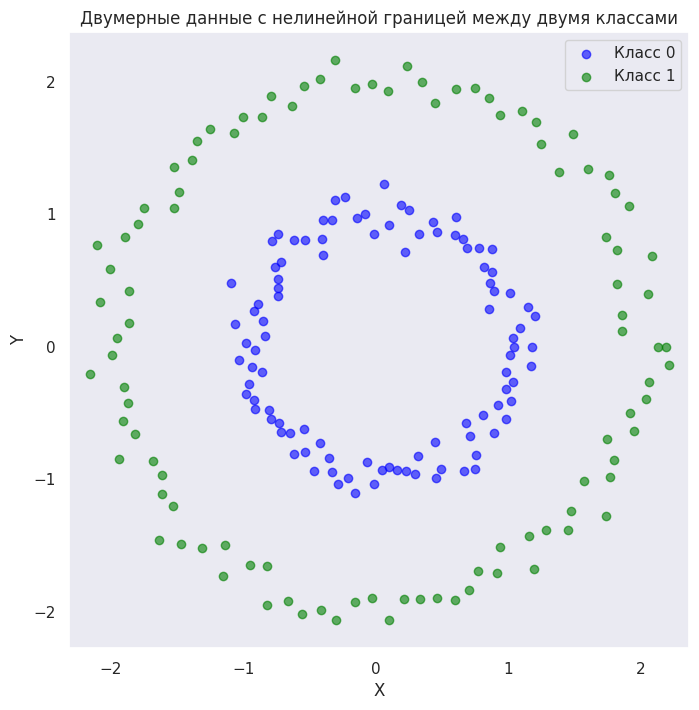

In [ ]:
np.random.seed(0)

n_samples = 100

theta1 = np.linspace(0, 2 * np.pi, n_samples)
r1 = 1 + 0.1 * np.random.randn(n_samples)
x1 = r1 * np.cos(theta1)
y1 = r1 * np.sin(theta1)

theta2 = np.linspace(0, 2 * np.pi, n_samples)
r2 = 2 + 0.1 * np.random.randn(n_samples)
x2 = r2 * np.cos(theta2)
y2 = r2 * np.sin(theta2)

X = np.vstack((x1, x2)).reshape(-1, 1)
y = np.hstack((np.zeros(n_samples), np.ones(n_samples)))

plt.figure(figsize=(8, 8))
plt.scatter(x1, y1, color='blue', label='Класс 0', alpha=0.6)
plt.scatter(x2, y2, color='green', label='Класс 1', alpha=0.6)
plt.title('Двумерные данные с нелинейной границей между двумя классами')
plt.xlabel('X')
plt.ylabel('Y')
plt.axis('equal')
plt.legend()
plt.grid()
plt.show()

### <font color='DarkOrange'>**Задание 6 [2 баллa]**</font>

Приведите искусственный пример (можно даже очень неправдоподобный), когда линейная регрессия с $l_2$ регуляризацией гарантированно занулит какой-нибудь признак? Покажите (теоретически или программно), что признак действительно зануляется


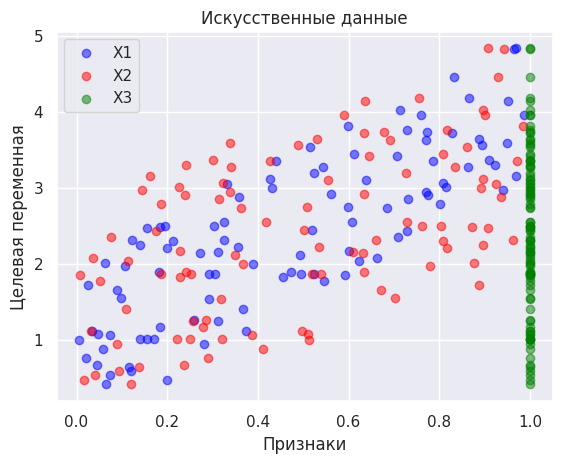

In [ ]:
np.random.seed(42)

n_samples = 100
X1 = np.random.rand(n_samples)
X2 = np.random.rand(n_samples)
X3 = np.ones(n_samples)          # Константный признак
y = 3 * X1 + 2 * X2 + np.random.normal(0, 0.1, n_samples)

data = pd.DataFrame({'X1': X1, 'X2': X2, 'X3': X3, 'y': y})

plt.scatter(data['X1'], data['y'], label='X1', color='blue', alpha=0.5)
plt.scatter(data['X2'], data['y'], label='X2', color='red', alpha=0.5)
plt.scatter(data['X3'], data['y'], label='X3', color='green', alpha=0.5)
plt.xlabel('Признаки')
plt.ylabel('Целевая переменная')
plt.title('Искусственные данные')
plt.legend()
plt.show()

In [ ]:
X = data[['X1', 'X2', 'X3']].values
y = data['y'].values

ridge_model = Ridge(alpha=1000)  # Высокое значение alpha для сильной регуляризации
ridge_model.fit(X, y)

coefficients = ridge_model.coef_
print(f'Коэффициенты модели: {coefficients}')

Коэффициенты модели: [0.02516081 0.01661755 0.        ]


<font color='MediumOrchid'>**Ваши выводы тут:**</font>

Если признак является константным, то при взятии производной функции потерь будет получаться 0.  Это происходит потому, что L2 регуляризация стремится минимизировать сложность модели и может решить, что константный признак не добавляет полезной информации для предсказания целевой переменной. Отсюда получим зануление веса.

**Выводы** В первой части задания по линейным моделям мы должны были узнать:
.

1.   Зачем нужна регуляризация.
2.   Как отбирать значащие признаки.
3.   Когда линейные модели работают хорошо, а когда плохо

-----
<font color="white" style="opacity:0.2023"></font>

Во **второй части** мы будем применять линейные модели для классификации реальных данных, где мы сможем проверить наши выводы, полученные на искуственных примерах. А также убедимся в полезности нормировки и научимся работать с разными видами данных.
